## Image Varification

In [1]:
import requests

url = "http://10.10.110.24:8111/predict/"
image_path = "Desktop/DR/DR_Images/NoDr_1.png"

with open(image_path, "rb") as f:
    response = requests.post(url, files={"file": f})


result = response.text.strip()  # Handle raw integer responses
print("Prediction Result:", result)


Prediction Result: {"prediction":1}


## DR Inference 

In [2]:
import requests

url = "http://10.10.110.24:8488/predict/"
image_path = "Desktop/DR/DR_Images/NoDr_1.png"

with open(image_path, "rb") as f:
    response = requests.post(url, files={"file": f})
    
print(response.json())

{'predictions': {'primary_classification': {'class_name': 'NON-REF', 'accuracy': 0.9580551981925964}, 'sub_classes': {'class_name': 'NO DR', 'accuracy': 0.84}}}


## DR Explainable


In [15]:
import requests

image_paths = [ "Desktop/DR/DR_Images/Severe/28 (227)_feecee510b81459cbdb6e4562920730e.png",
               "Desktop/DR/DR_Images/Severe/28 (309)_91c7270fd262409a82b995af0ece849f.png"]
# image_paths = ["Downloads/hero1.png","Downloads/hero1.png"]

# Prepare files for request
files = [("files", (path.split("/")[-1], open(path, "rb"), "image/png")) for path in image_paths]

# Send request
url = "http://10.10.110.24:8118/predict"
response = requests.post(url, files=files)
response_data = response.json()

## For visualise the above responce

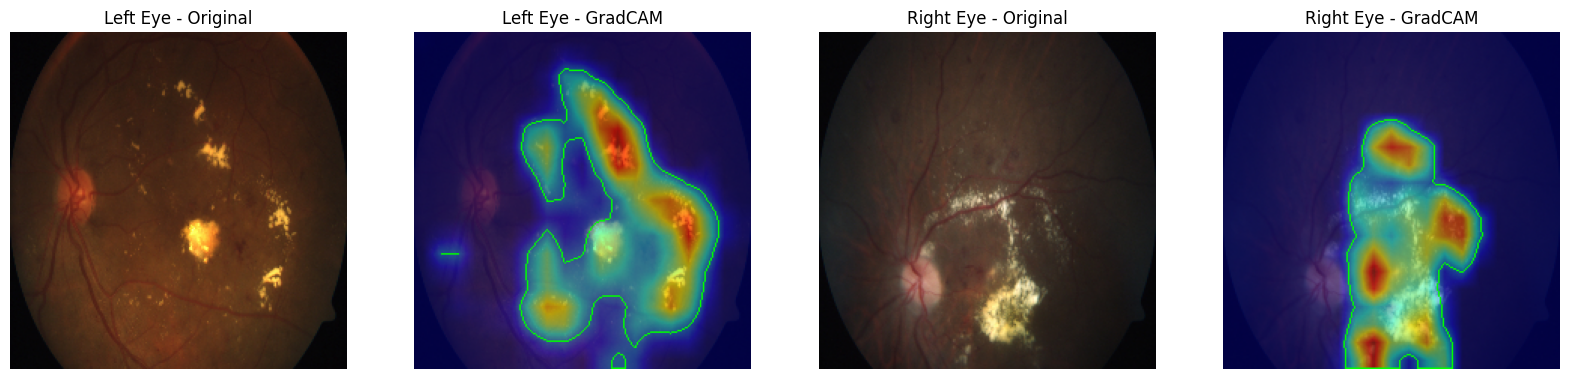

In [16]:
import os
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt 

def decode_base64_image(base64_str):
    return Image.open(BytesIO(base64.b64decode(base64_str)))
    
left_original = Image.open(image_paths[0])
right_original = Image.open(image_paths[1])

# Extract and decode images
left_gradcam = decode_base64_image(response_data["predicted_images"]["left_eye"]["gradcam_image"])
right_gradcam = decode_base64_image(response_data["predicted_images"]["right_eye"]["gradcam_image"])

# Plot all four images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(left_original)
axes[0].set_title("Left Eye - Original")
axes[0].axis("off")

axes[1].imshow(left_gradcam)
axes[1].set_title("Left Eye - GradCAM")
axes[1].axis("off")

axes[2].imshow(right_original)
axes[2].set_title("Right Eye - Original")
axes[2].axis("off")

axes[3].imshow(right_gradcam)
axes[3].set_title("Right Eye - GradCAM")
axes[3].axis("off")

plt.show()


## Glaucoma inference

In [6]:
import os
import requests

# Define API endpoint
API_URL = "http://10.10.110.24:8171/predict"  # Change to your server's URL if hosted remotely# Paths to the input images
left_eye_path = "Downloads/DRISHTI-GS1-train-10.png"
right_eye_path = "Downloads/DRISHTI-GS1-train-14 (1).png"

# Open the images in binary mode
with open(left_eye_path, "rb") as left_eye_file, open(right_eye_path, "rb") as right_eye_file:
    # Create a dictionary of files to send
    files = {
        "lefteye": left_eye_file,
       "righteye": right_eye_file
    }
    # Send a POST request
    response = requests.post(API_URL, files=files)
results = response.json()



## For visualise the above responce


=== LEFT_EYE RESULTS ===
VCDR: 0.80
Predicted Class: 0
Probability: 0.6758
glaucoma_status: Suspect Glaucoma


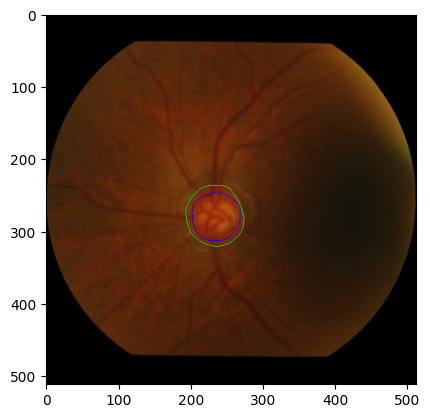


=== RIGHT_EYE RESULTS ===
VCDR: 0.79
Predicted Class: 0
Probability: 0.9095
glaucoma_status: Suspect Glaucoma


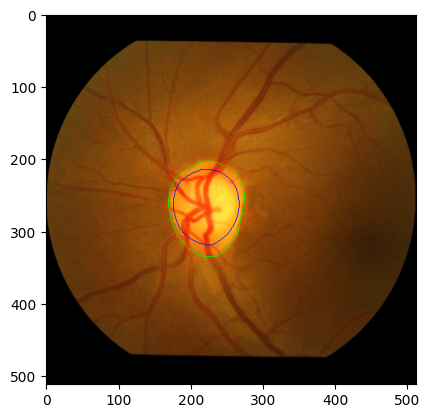

In [7]:
import base64
import numpy as np
import cv2
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt 
for eye in ["left_eye", "right_eye"]:
    print(f"\n=== {eye.upper()} RESULTS ===")
    print(f"VCDR: {results[eye]['VCDR']:.2f}")
    print(f"Predicted Class: {results[eye]['predicted_class']}")
    print(f"Probability: {results[eye]['probability']:.4f}")
    print(f"glaucoma_status: {results[eye]['glaucoma_status']}")
    # Convert Base64 images back to NumPy arrays for display
    def base64_to_image(base64_string):
        img_data = base64.b64decode(base64_string)
        return Image.open(BytesIO(img_data))
    def base64_to_cv2_image(base64_string: str):
        img_data = base64.b64decode(base64_string)
        np_arr = np.frombuffer(img_data, dtype=np.uint8)
        return cv2.imdecode(np_arr, cv2.IMREAD_COLOR) 
    contour_image = base64_to_cv2_image(results[eye]["contour_image"])
    plt.imshow(contour_image)
    plt.show()

## CLAHE IMAGE

In [8]:
import requests

url = "http://10.10.110.24:8444/process"
image_path = "Downloads/DRISHTI-GS1-train-14 (1).png"

with open(image_path, "rb") as f:
    response = requests.post(url, files={"file": f})
    data = response.json()

## For visualise the above responce

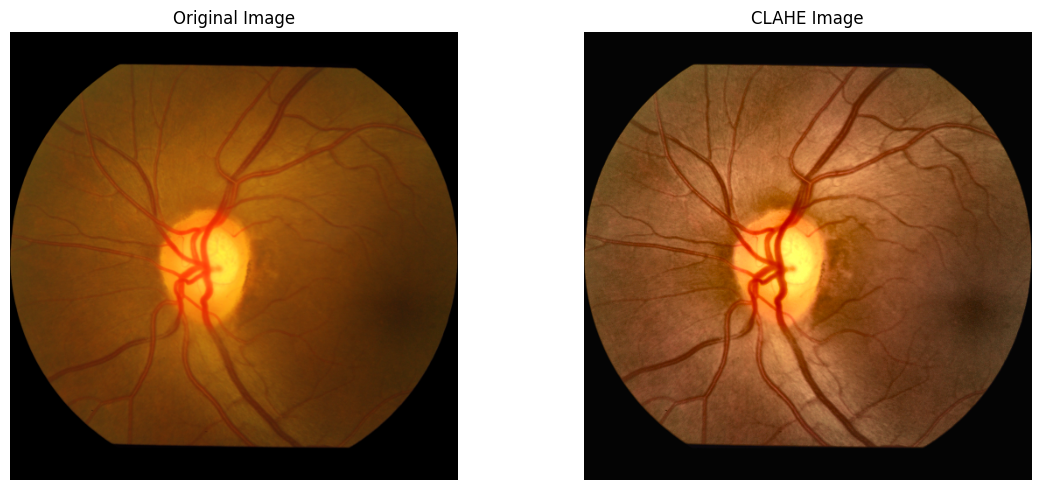

In [9]:
import base64
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

def decode_base64_to_cv2(base64_string):
    image_data = base64.b64decode(base64_string)
    np_arr = np.frombuffer(image_data, np.uint8)
    return cv2.imdecode(np_arr, cv2.IMREAD_UNCHANGED)

clahe_image = decode_base64_to_cv2(data["clahe_image"])
orgi_image = cv2.imread(image_path)
orgi_image = cv2.cvtColor(orgi_image, cv2.COLOR_BGR2RGB)

# Plot images separately using Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(orgi_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(clahe_image)
axes[1].set_title("CLAHE Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()


## AMD inference 

In [10]:
import requests

# Set the FastAPI server URL (Modify if running on a different machine)
API_URL = "http://10.10.110.24:8319/amd_predict/"

# Paths to the left and right eye images
left_eye_path = "Desktop/DR/DR_Images/Severe/28 (227)_feecee510b81459cbdb6e4562920730e.png"
right_eye_path = "Desktop/DR/DR_Images/Severe/28 (227)_feecee510b81459cbdb6e4562920730e.png"

# Open both image files
with open(left_eye_path, "rb") as left_img, open(right_eye_path, "rb") as right_img:
    files = {
        "left_eye": left_img,
        "right_eye": right_img
    }
    
    # Send POST request
    response = requests.post(API_URL, files=files)
    response_data = response.json()

# Print predicted classes
print(f"✅ Left Eye Prediction: {response_data.get('left_eye_prediction')}")
print(f"✅ Right Eye Prediction: {response_data.get('right_eye_prediction')}")


✅ Left Eye Prediction: 1
✅ Right Eye Prediction: 1
